# 狗狗识别
使用TensorFlow CNN训练，识别图片中的狗是不是瓜瓜(我家的狗）


In [83]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf 
import numpy as np
import os
from tensorflow.keras.optimizers import RMSprop
from tensorflow import keras
import pandas as pd

##  加载图片

In [84]:
train_mydog_dir = os.path.join('image/mydog')
train_otherdog_dir = os.path.join('image/otherdog')

In [85]:
train_mydog_names = os.listdir(train_mydog_dir)
print(train_mydog_names[:10])

train_otherdog_names = os.listdir(train_otherdog_dir)
print(train_otherdog_names[:10])

['.DS_Store', 'DSC01304.jpg', 'DSC01394.jpg', 'DSC01421.jpg', 'DSC01422 (1).jpg', 'DSC01422.jpg', 'DSC01423.jpg', 'DSC01424.jpg', 'DSC01426.jpg', 'DSC01427.jpg']
['.DS_Store', 'ak.jpg', 'IMG_0330.jpg', 'IMG_0673.jpg', 'IMG_0675.jpg', 'IMG_4108.jpg', 'IMG_6329.jpg', 'IMG_7713.jpg', 'IMG_7731.jpg', 'IMG_7813.jpg']


In [86]:
print("total mydog training is "+str(len(train_mydog_names)))
print("total other training is "+str(len(train_otherdog_names)))

total mydog training is 82
total other training is 35


In [95]:
tf.reset_default_graph()
session = tf.Session()
session.run(tf.global_variables_initializer())

## 构建模型

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(300,300,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation= "relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 33, 33, 128)      

In [75]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0005),
              metrics=['acc'])

In [76]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=30,
                                   zoom_range=0.5,
                                   horizontal_flip=True,
                                   vertical_flip = True,
                                   fill_mode = "nearest",
                                    width_shift_range=0.3
                          )

train_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
        'image/',  # 训练图片的路径
        target_size=(300, 300),  # resized to 300X300
        batch_size=32,
        class_mode='binary')


Found 115 images belonging to 2 classes.


In [77]:
model.fit_generator(
      train_generator,
      steps_per_epoch=5,  
      epochs=10,
      verbose=1)

Epoch 1/10
5/5 [==============================] - 46s 9s/step - loss: 0.7470 - acc: 0.5714
Epoch 2/10
5/5 [==============================] - 40s 8s/step - loss: 0.6695 - acc: 0.7015
Epoch 3/10
5/5 [==============================] - 42s 8s/step - loss: 0.5838 - acc: 0.7415
Epoch 4/10
5/5 [==============================] - 43s 9s/step - loss: 0.6135 - acc: 0.6599
Epoch 5/10
5/5 [==============================] - 47s 9s/step - loss: 0.6011 - acc: 0.7687
Epoch 6/10
5/5 [==============================] - 39s 8s/step - loss: 0.5356 - acc: 0.7761
Epoch 7/10
5/5 [==============================] - 46s 9s/step - loss: 0.6859 - acc: 0.6531
Epoch 8/10
5/5 [==============================] - 42s 8s/step - loss: 0.5537 - acc: 0.7483
Epoch 9/10
5/5 [==============================] - 37s 7s/step - loss: 0.5335 - acc: 0.7687
Epoch 10/10
5/5 [==============================] - 44s 9s/step - loss: 0.4474 - acc: 0.7937


In [78]:
saver.save(session,"model/dog-model.ckpt")
tf.train.Checkpoint(model = model)

'model/dog-model.ckpt'

## 预测

['ak.jpg', 'bobi.jpg', 'bobi2.jpeg', 'guagua.jpg', 'gugua3.jpg', 'IMG_7929.jpg', 'IMG_7935.jpg', 'IMG_E7930.jpg', 'mydog.jpg', 'other.jpg', 'other2.jpg', 'otherdog.jpg', 'WechatIMG83.jpeg', 'WechatIMG84.jpeg', 'WechatIMG85.jpeg']


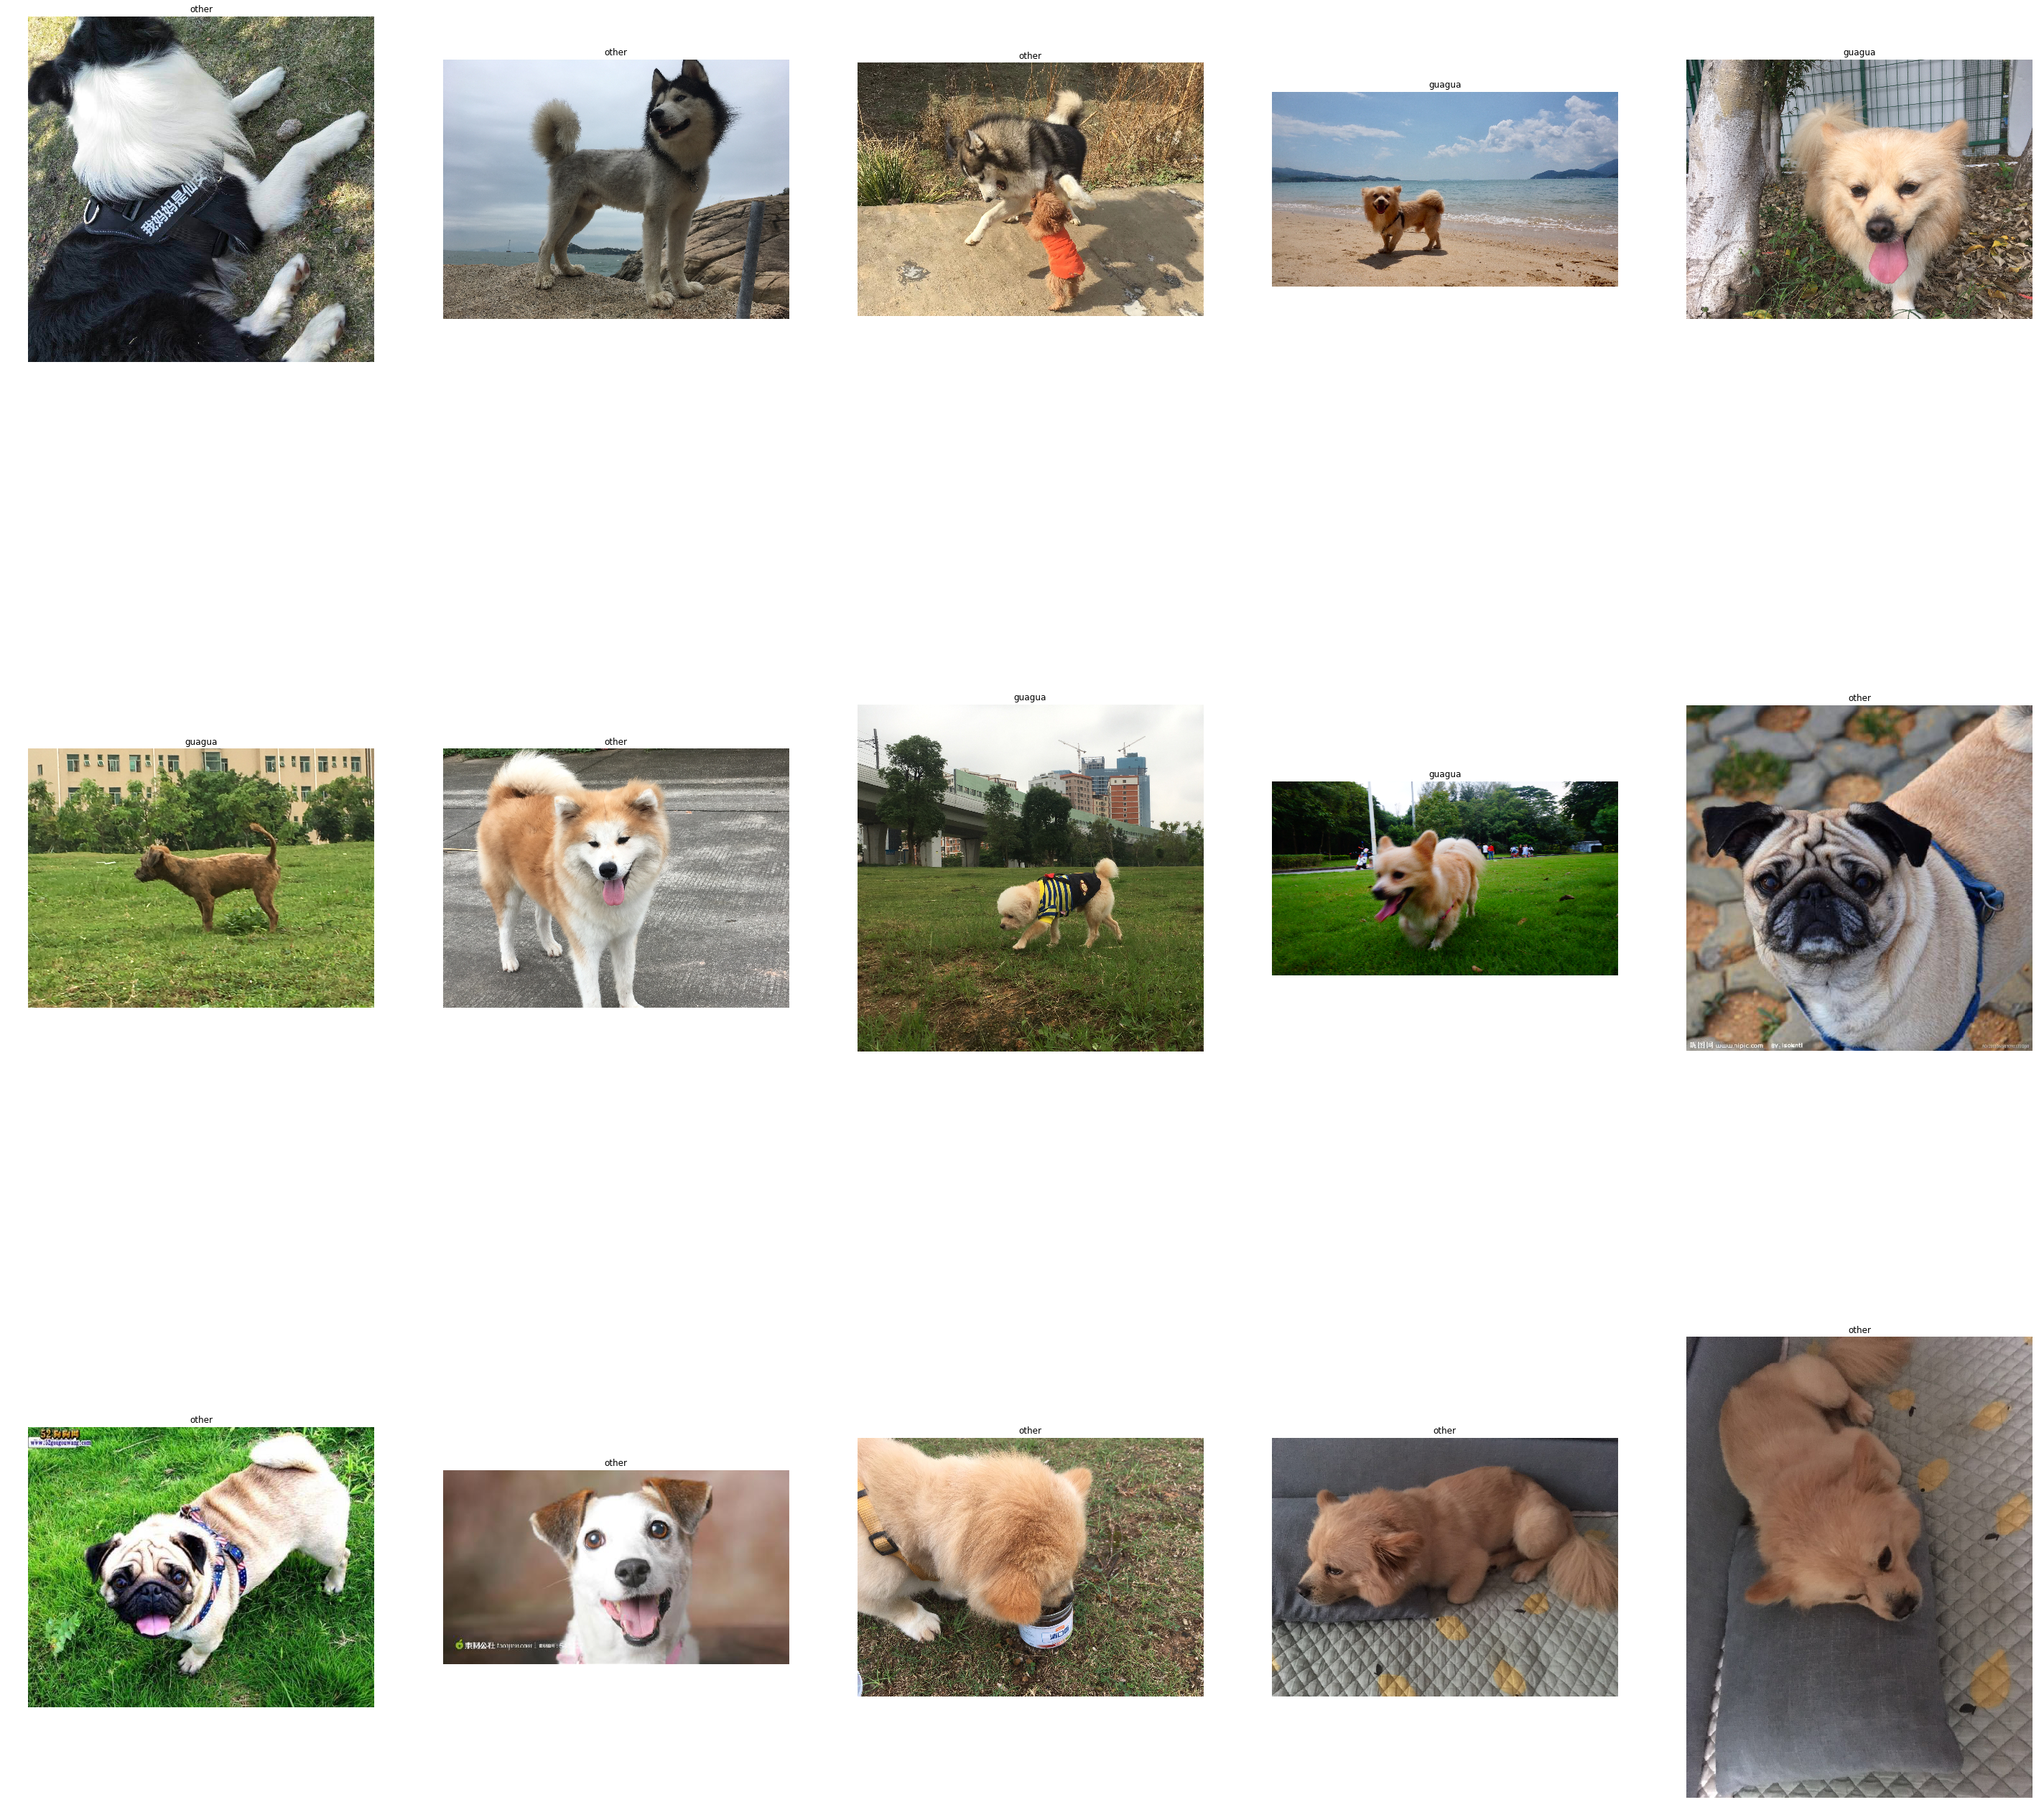

In [50]:
import numpy as np
from keras.preprocessing import image

test_dog_dir = os.path.join('testdog/all_image/')
testdog_names = os.listdir(test_dog_dir)
test_size = len(testdog_names)
print(testdog_names)
columns = 5
rows = int(test_size/5)
if test_size%5 != 0:
    rows = rows+1
f,ax = plt.subplots(rows,columns,figsize=(20,20))
for i in range(0,len(testdog_names)):
    # predicting image
    file_name = testdog_names[i]
    path = test_dog_dir + file_name
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    classes = model.predict(x, batch_size=10)
    label = None
    if classes[0] > 0.5:
        label = "other"
    else:
        label="guagua"
    img_data = mpimg.imread(path)
    ax_idx_row = int(i/columns)
    ax_idx_col = int(i%columns)
    ax[ax_idx_row][ax_idx_col].imshow(img_data)
    ax[ax_idx_row][ax_idx_col].set_title(label)
    ax[ax_idx_row][ax_idx_col].axis("off")
    
plt.show()

In [46]:
test_datagen = ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_directory('testdog/',
                                                 target_size=(300,300),
                                                 class_mode='binary',
                                                 batch_size = 15)
pred_y = model.predict_generator(test_generator,steps=1,verbose=1)

Found 15 images belonging to 1 classes.
1/1 [==============================] - 3s 3s/step


In [47]:
print(test_generator.filenames)

['all_image/IMG_7929.jpg', 'all_image/IMG_7935.jpg', 'all_image/IMG_E7930.jpg', 'all_image/WechatIMG83.jpeg', 'all_image/WechatIMG84.jpeg', 'all_image/WechatIMG85.jpeg', 'all_image/ak.jpg', 'all_image/bobi.jpg', 'all_image/bobi2.jpeg', 'all_image/guagua.jpg', 'all_image/gugua3.jpg', 'all_image/mydog.jpg', 'all_image/other.jpg', 'all_image/other2.jpg', 'all_image/otherdog.jpg']


In [48]:
pred_y = np.where(pred_y > 0.5,1,0)
print(np.squeeze(pred_y))
pred_y = np.squeeze(pred_y)

[1 0 1 1 0 1 0 0 0 1 0 0 0 1 1]


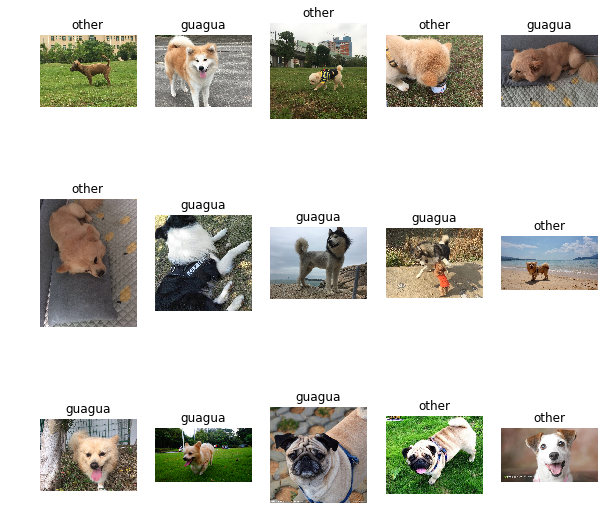

In [52]:
columns = 5
test_size = len(test_generator.filenames)
test_dog_dir = os.path.join('testdog/')
rows = int(test_size/5)
if test_size%5 != 0:
    rows = rows+1
f,ax = plt.subplots(rows,columns,figsize=(10,10))
for i in range(0,test_size):
    # predicting image
    filename = test_generator.filenames[i]
    path = test_dog_dir + filename
    if(pred_y[i] == 1):
        label="other"
    else:
        label = "guagua"
        
    ax_idx_row = int(i/columns)
    ax_idx_col = int(i%columns)
    img_data = mpimg.imread(path)
    ax[ax_idx_row][ax_idx_col].imshow(img_data)
    ax[ax_idx_row][ax_idx_col].set_title(label)
    ax[ax_idx_row][ax_idx_col].axis("off")
plt.show()

In [68]:
#将预测结果与图片编号进行保存
filenames = test_generator.filenames
filenames = [filename.replace("all_image/","") for filename in filenames]
results = np.vstack((np.array(filenames).T,pred_y.T))
pd.DataFrame(results.T,columns=["name","label"])

name label
0       IMG_7929.jpg     1
1       IMG_7935.jpg     0
2      IMG_E7930.jpg     1
3   WechatIMG83.jpeg     1
4   WechatIMG84.jpeg     0
5   WechatIMG85.jpeg     1
6             ak.jpg     0
7           bobi.jpg     0
8         bobi2.jpeg     0
9         guagua.jpg     1
10        gugua3.jpg     0
11         mydog.jpg     0
12         other.jpg     0
13        other2.jpg     1
14      otherdog.jpg     1

TypeError: save() missing 1 required positional argument: 'save_path'

In [79]:
session.close()